In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Lets create some non linear data by using quadratic equation (y = aX**2 + bX + c)
m = 100
X = 6*np.random.randn(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1) 

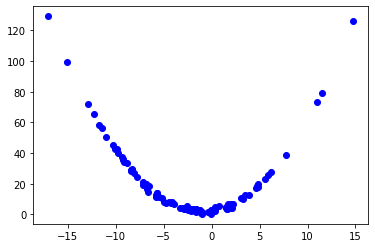

In [11]:
plt.plot(X, y, 'bo')

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features. fit_transform(X)
X[0]

array([-1.96424575])

In [13]:
X_poly[0] # we have sucessfully converted our features to second degree pollynomial.

array([-1.96424575,  3.85826137])

In [15]:
# X_poly now contains the original feature of X plus the square of this feature. 
# Now you can fit a LinearRegression model to this extended training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.31072991]), array([[0.98948193, 0.49661501]]))

### Learning Curves

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range (1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

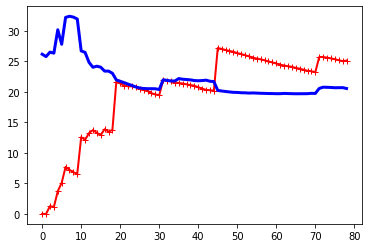

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)